# Importing essential packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans , SpectralClustering ,AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Reading Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Profiling and Exploration

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("mall_dataset_report.html")

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Selection

In [4]:
df = df.drop( ["CustomerID" ,'Gender' ] , axis = 1 )

# Rescaling/Normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

scaled = scaler.fit_transform( df ) 
for col in df.columns:
    df[col] = scaled[: , :1 ]
    scaled = scaled[: , 1:]
    
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


# K Means Clustering

### Finding the optimal value of n using elbow method

In [6]:
inertias = []
for n in range( 1 , 15 ):
    kmeans = KMeans(n_clusters = n, random_state=0).fit(df)
    inertias.append( kmeans.inertia_ )

### Plotting sum of squared distances against n clusters

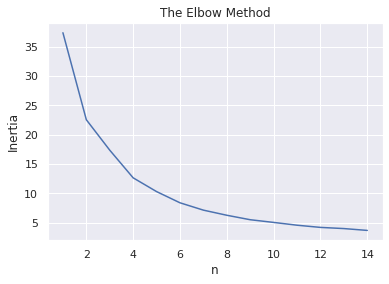

In [7]:
plt.plot(np.arange(1 , 15) , inertias )
plt.title('The Elbow Method')
plt.xlabel('n')
plt.ylabel('Inertia')
plt.show()

From the plot we can see that the squared sum falls at a high rate until 6.
Hence we shall select 6 as the value for k.

### Clustering Data

In [8]:
model = KMeans( n_clusters = 6 ).fit(df)
labels = model.labels_
labelled_df = df.copy()
labelled_df['label'] = labels

### Printing the label and number of elements in each cluster 

In [9]:
uniq ,freq = np.unique(labels , return_counts = True)
for un , fr in zip( uniq , freq ):
    print(un , fr)

0 39
1 33
2 45
3 22
4 20
5 41


### Average values of features for each cluster

In [10]:
labelled_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100)
label,,,
0,0.282544,0.586381,0.827839
1,0.460373,0.606061,0.162956
2,0.737179,0.321858,0.490476
3,0.139860,0.087928,0.799629
4,0.543269,0.096311,0.177041
5,0.167448,0.328669,0.476605


## Cluster Visualization

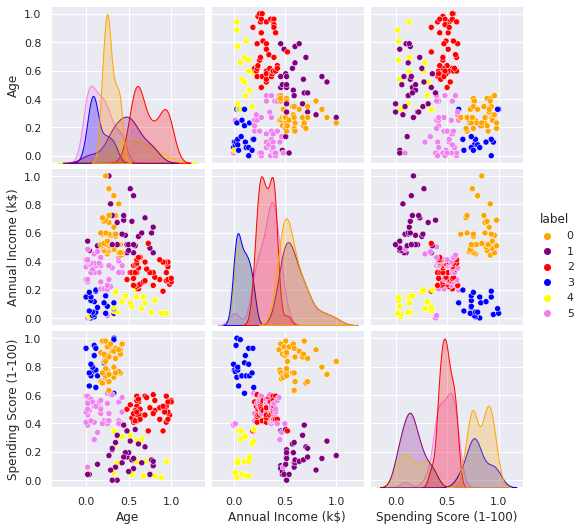

In [11]:
color_palette = {0:'orange', 1:'purple', 2:'red', 3:'blue', 4:'yellow', 5:'#EE82EE'}
sns.pairplot( labelled_df , hue = 'label' , palette = color_palette )

In [12]:
import plotly as py
import plotly.graph_objs as go

plot = go.Scatter3d( x= labelled_df['Age'], y= labelled_df['Spending Score (1-100)'], z= labelled_df['Annual Income (k$)'], mode='markers',
     marker=dict( color = labelled_df['label'], size = 3, line=dict( color= labelled_df['label'], width= 12 ), opacity=1 )
)
layout = go.Layout(
    title= 'KMeansClustering',
    scene = dict( xaxis = dict(title  = 'Age'), yaxis = dict(title  = 'Spending Score'), zaxis = dict(title  = 'Annual Income') )
)

fig = go.Figure([plot] , layout = layout)
fig.write_html('3d_plot')

# The dataset can be classified as six groups --:

## Cluster quality check

In [13]:
score = silhouette_score( df, labels, metric='euclidean')
print(score)

0.42309315456649105


# Hierarchal Clustering

In [14]:
model = AgglomerativeClustering( n_clusters = 6 ).fit(df)
labels = model.labels_
labelled_df = df.copy()
labelled_df['label'] = labels

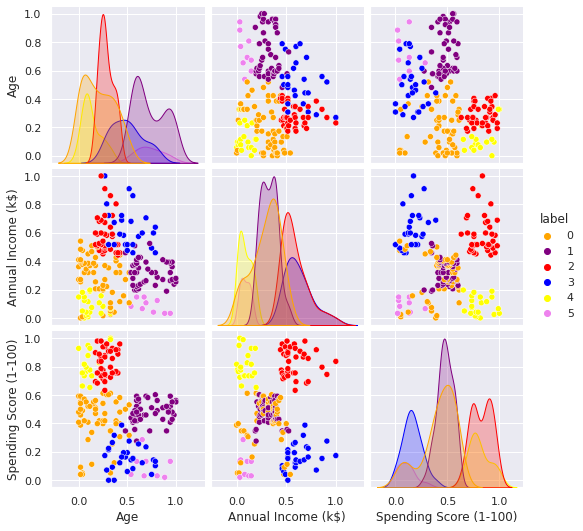

In [15]:
sns.pairplot( labelled_df , hue = 'label' , palette = color_palette )

## Cluster quality check

In [16]:
score = silhouette_score( df, labels, metric='euclidean')
print(score)

0.39826514063301693


# Spectral Clustering

In [17]:
model = SpectralClustering( n_clusters = 6 ).fit(df)
labels = model.labels_
labelled_df = df.copy()
labelled_df['label'] = labels

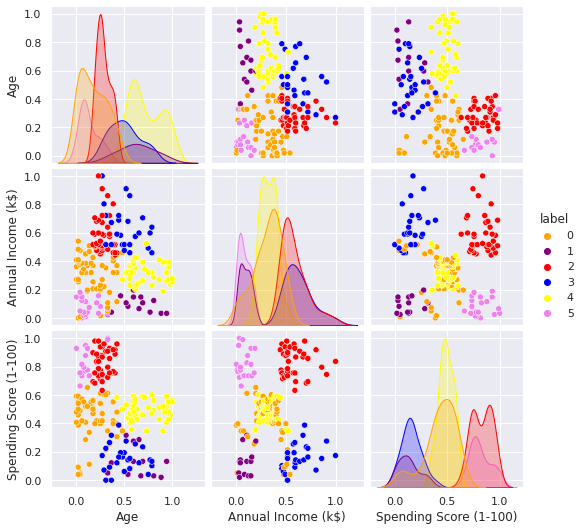

In [18]:
sns.pairplot( labelled_df , hue = 'label' , palette = color_palette )

## Cluster quality check

In [19]:
score = silhouette_score( df, labels, metric='euclidean')
print(score)

0.41408202583099724
